<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('real_estate_data.csv', sep='\t')
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [369]:
nan_date = data.columns[data.isna().sum() >1] # выведем список названия столбцов с пропущенными значениями
nan_date_count = pd.DataFrame(data[nan_date].isna().sum(), columns=['count']) # соберем список в таблицу с количеством пропущенных значений  
nan_date_count['%'] = (nan_date_count['count']/data.shape[0]*100).round(2)
nan_date_count

,count,%
ceiling_height,9195,38.80
floors_total,86,0.36
living_area,1903,8.03
is_apartment,20924,88.29
kitchen_area,2278,9.61
balcony,11519,48.61
locality_name,49,0.21
airports_nearest,5542,23.38
cityCenters_nearest,5519,23.29
parks_around3000,5518,23.28


Изучим каждый столбец на уникальность значений и аномалии

In [370]:
for i in data.columns:
    print(i, ' \n', data[i].unique())
    print('-'*50)

total_images  
 [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
--------------------------------------------------
last_price  
 [13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
--------------------------------------------------
total_area  
 [108.    40.4   56.   ...  66.86 133.81  76.75]
--------------------------------------------------
first_day_exposition  
 ['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']
--------------------------------------------------
rooms  
 [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
--------------------------------------------------
ceiling_height  
 [  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34 

Вывод:

Из данных видно, что в столбцах имеютя пропуски, дубликаты, неуместные типы данных и аномалии значений и названия столбцов (cityCenters_nearest). Для начала переведем тиа данных в подходящий: 
* last_price - можно перевести в int
* total_area - можно для удобства округлить в ближайшую сторону и перевести в int
* floors_total - переведем в int
* balcony - переведем в int
* airports_nearest, cityCenters_nearest - переведем в int
* parks_around3000, ponds_around3000 - переведем в int
* parks_nearest, ponds_nearest - можно для удобства округлить в ближайшую сторону и перевести в int
* days_exposition - переведем в int
* first_day_exposition - перевести в формат datetime
* Столбцы имеющие булевы значения переписать со значениями 0 и 1.


## Предобработка данных

На этом шаге мы:

* Заполним пропущенные значения
* Изменим формат данных там, где это необходимо

Заполним пропущенные значения

In [371]:
# проверим каждый столбец таблицы nan_date_count
nan_date_count

,count,%
ceiling_height,9195,38.80
floors_total,86,0.36
living_area,1903,8.03
is_apartment,20924,88.29
kitchen_area,2278,9.61
balcony,11519,48.61
locality_name,49,0.21
airports_nearest,5542,23.38
cityCenters_nearest,5519,23.29
parks_around3000,5518,23.28


In [372]:
# проверим распределение высоты потолков
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Из распределения видно, что максимальная высота 100 метров, а минимальная 1. Такими квартиры не бывают, похоже на аномалию. Посмотрим распределение на гистограмме.

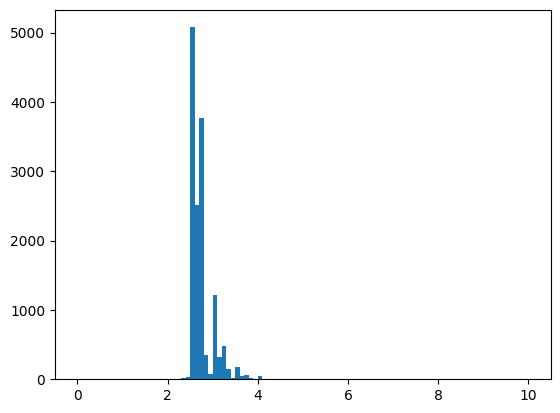

In [373]:
plt.hist(data['ceiling_height'], bins=100, range=(0, 10))
plt.show()

Так и есть, основная масса значений лежит в интервале от 2,5 до 4 метров, что вполне стандартное значение высота. 

In [374]:
print(len(data.query('2.5>ceiling_height<4')))
data.query('(ceiling_height<2.5) or (ceiling_height>4)')['ceiling_height'].unique()

73


array([  4.15,   2.47,   2.34,  25.  ,   5.2 ,   2.  ,   2.45,   2.46,
         5.3 ,   5.  ,   4.06,   4.7 ,   2.4 ,   5.6 ,   2.3 ,   2.48,
         4.19,   4.8 ,   4.5 ,   4.2 ,  32.  ,   8.  ,   4.37,  27.  ,
         4.1 ,  24.  ,  26.  ,   1.2 ,   8.3 ,   4.4 ,   4.45,   5.5 ,
         4.3 ,   4.65,   2.2 ,  14.  ,   4.14,   1.75,   4.25,  20.  ,
         2.25,   6.  ,  22.6 ,   5.8 ,  27.5 ,   2.49,   4.9 ,  10.3 ,
         1.  , 100.  ])

всего 73 значения лежат вне интервала значений, ими можно пренибречь при дальнейшем анализе, а пропуски заполнить медианным значением, что близко к норме по строительным СНиП

In [375]:
# для заполнения высоты возьмем медианное значение  
median_ceiling = data['ceiling_height'].median()
data['ceiling_height'].fillna(median_ceiling, inplace=True)
# так же уберем аномалии в виде потолков свыше 4 метров и ниже 2,5 (выявили по гистограмме) 
data = data.query('2.5<ceiling_height<4')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [376]:
# Столбец floors_total посмотрим, что это за пропуски, а так же оцценим остальные значения
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Значения из разных групп и никак не связаны логически, можно принять решение их удалить

In [377]:
data.dropna(subset=['floors_total'], inplace=True) # удаляем пустые значения из столбца floors_total

In [378]:
# проверяем данные столбца floors_total 
data['floors_total'].describe()

count    19911.000000
mean        11.228216
std          6.847287
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Максимальное значение 60 этажей. Самое высокое здание в санкт-питербурге имеет высоту 45 этажей, тут явно что-то не то.

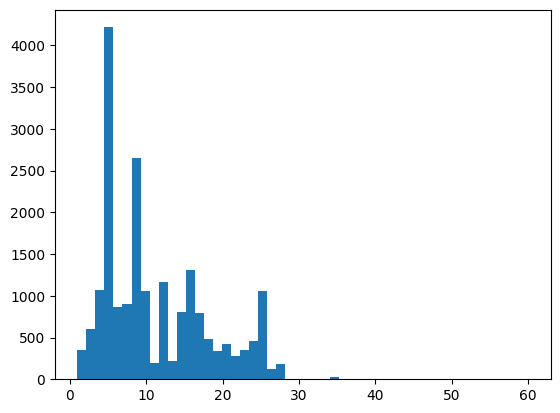

In [379]:
# построим гистограмму распределения
plt.hist(data['floors_total'], bins=50)
plt.show()

Отсечем хвост свыше 30 этажей из-за неправдаподобности значений

29


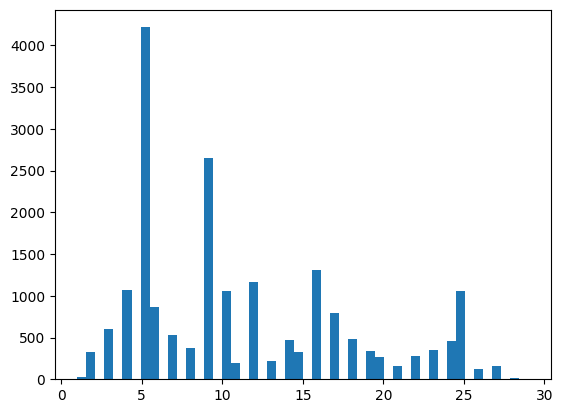

In [380]:
print(len(data.query('floors_total>30')))
data = data.query('floors_total<30') # срез по столбцу floors_total меньше 30 этажей
plt.hist(data['floors_total'], bins=50)
plt.show()

29 значений не большое число аномалий, чтобы смело их удалить и исключить искажение 

Проверим столбец living_area.

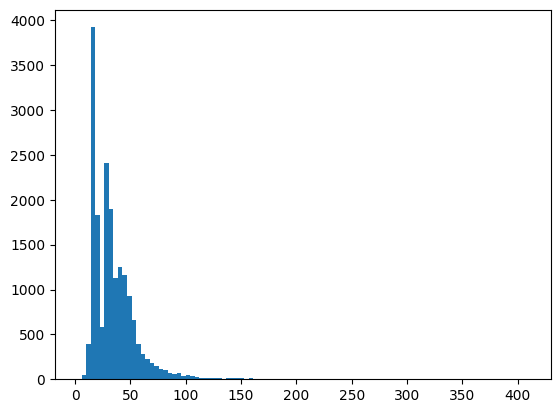

In [381]:
plt.hist(data['living_area'], bins=100)
plt.show()

Проверим какое количество значений имеет очень большую жилую площадь

In [382]:
data.query('living_area>200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,49950000.0,483.9,2017-10-04T00:00:00,7,3.20,6.0,312.5,4,NaN,...,26.4,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.30,5.0,250.0,2,NaN,...,50.0,NaN,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
866,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,...,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
1494,10,65000000.0,364.0,2018-11-27T00:00:00,7,3.90,6.0,250.0,3,NaN,...,20.0,NaN,Санкт-Петербург,21988.0,3254.0,0.0,NaN,1.0,689.0,46.0
2580,6,30900000.0,338.6,2017-10-16T00:00:00,7,3.86,6.0,230.0,4,NaN,...,20.0,NaN,Санкт-Петербург,24957.0,5641.0,0.0,NaN,0.0,NaN,406.0
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,2.65,4.0,332.0,3,NaN,...,22.0,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
6221,8,34000000.0,470.3,2018-01-14T00:00:00,4,2.65,3.0,248.7,3,NaN,...,40.0,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0
6621,20,99000000.0,488.0,2017-04-09T00:00:00,5,2.95,20.0,216.0,17,NaN,...,50.0,NaN,Санкт-Петербург,27641.0,4598.0,1.0,646.0,1.0,368.0,351.0
7857,11,150000000.0,230.0,2017-10-25T00:00:00,8,2.65,8.0,220.0,8,NaN,...,NaN,NaN,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,135.0


Немного значений, всего 26. Судя по цене это представители элитной недвижимости. 

Проверим столбец is_apartment 

In [383]:
data['is_apartment'].value_counts()

is_apartment
False    2388
True       42
Name: count, dtype: int64

Очень много значений пропущенно и всего 42 значения отмечены, как аппартаменты. Зная, что в аппартаментах нельзя прописаться, эти данные продавцы могли скрыть от пользователя. Стоит этот пункт сделать обязательным воизбежание таких пропусков.

Данные пропуски мы заполним значением "-1". Тогда, если нам нужно будет отфильтровать только заполненные значения, будет удобно воспользоваться булевым фильтром is_apartment >= 0

In [384]:
data['is_apartment'] = data['is_apartment'].fillna(-1) #заполним пропуски
data['is_apartment'].isna().sum() #проверим рещультат заполнения

0

Проверим столбец kitchen_area. Столбец имеет 2278 пропусков. Так как в таблице имеется вид квартир как студия, проверим мог ли пользователь не указать площадь кухни и счесть ее жилой. Проверим количество студий в пропусках.

In [385]:
print('Количество студий в пропусках:',len(data.query('(studio == True) and (kitchen_area.isna())')))

Количество студий в пропусках: 141


In [386]:
# проверим указана ли площадь кухни для студий
data.query('studio==True')['kitchen_area'].unique()

array([nan])

In [387]:
# Заменим значения площади кухни на 0 у всех студий
data.loc[(data['kitchen_area'].isna()) & (data['studio']==True), 'kitchen_area'] = data.loc[(data['kitchen_area'].isna()) & (data['studio']==True), 'kitchen_area'].fillna(0)

In [388]:
print('Количество пропусков в столбце kithen_area в срезе по студиям:', len(data.query('kitchen_area.isna() and studio == True')))
print('Оставшиеся пропуски в столбце kithen_area:', data['kitchen_area'].isna().sum())

Количество пропусков в столбце kithen_area в срезе по студиям: 0
Оставшиеся пропуски в столбце kithen_area: 1850


Столбец balcony. В данном случае логично предположить, что если собственник не указал количество балконов, скорее всего их нет.

In [389]:
# заменим пустые значения столбца наличия балкона на 0
data['balcony'].fillna(0, inplace=True)

In [390]:
#  уберем пустые строки из столбца расположение недвижимости 
data.dropna(subset=['locality_name'], inplace=True)

In [391]:
nan_date_count

,count,%
ceiling_height,9195,38.80
floors_total,86,0.36
living_area,1903,8.03
is_apartment,20924,88.29
kitchen_area,2278,9.61
balcony,11519,48.61
locality_name,49,0.21
airports_nearest,5542,23.38
cityCenters_nearest,5519,23.29
parks_around3000,5518,23.28


In [392]:
# переименуем столбцы: cityCenters_nearest, parks_around3000, ponds_around3000 в приемлимый формат
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3000','ponds_around3000':'ponds_around_3000'})

Столбец airports_nearest и city_сenters_nearest трогать не будем по причине больших количества пропусков и сильного влияния на конечный результат. 

Столбец parks_around_3000. Посмотрим, как распределены данные.

In [393]:
data['parks_around_3000'].value_counts()

parks_around_3000
0.0    8484
1.0    4774
2.0    1524
3.0     576
Name: count, dtype: int64

In [394]:
# Заменим пропущенные данные на 0, так как можно предполодить, что если данных нет, то нет и парков
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

In [395]:
print('Объекты с неуказанным расстоянием до ближайшего парка', len(data[data.parks_nearest.isna()]))
print('Объекты, которые не имеют ни одного парка в радиусе 3км', len(data[data.parks_around_3000 == 0]))

Объекты с неуказанным расстоянием до ближайшего парка 12957
Объекты, которые не имеют ни одного парка в радиусе 3км 12961


Есть 4 объекта, которые не имеют ни одного парка в радиусе 3км, но при этом у них указано расстояние до ближайшего парка. Посмотрим на строки, содержащие такие объекты

In [396]:
data[~(data['parks_nearest'].isna())&(data['parks_around_3000'] == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,2.65,18.0,37.0,13,-1,...,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,2.65,5.0,17.7,2,-1,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.00,2.0,80.0,2,-1,...,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.60,5.0,16.5,1,-1,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


Все логично. Для объектов, которые не имеют в радиусе 3км ни одного парка, указано расстояние большее 3000м.
Следовательно, мы можем предположить, что объекты, которые не имеют ни одного парка в радиусе 3км и имеют в стобце parks_nearest пропуски, имеют расстояние до парка больше 3000м.
Так как мы не сможем на основании текущих данных определить какое именно это расстояние, оставим на их месте пропуски.

Столбец ponds_around3000, 5518 пропущенных значений.

In [397]:
data['ponds_around_3000'].value_counts()

ponds_around_3000
0.0    7457
1.0    4859
2.0    1676
3.0    1366
Name: count, dtype: int64

Наиболее часто встречающееся значение - 0. Мы можем предположить, что пропуски в данном столбце обозначают отсутсвие прудов в радиусе 3 км, аналогично кейсу с наличием парков. Заполним пропуски 0. 

In [398]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
data['ponds_around_3000'].isna().sum()

0

Столбец ponds_nearest. Проверим, есть ли пропуски в строках с объектами, рядом с которыми расположен хотя бы 1 пруд.

In [399]:
len(data[(data['ponds_around_3000'].isna())&(data['ponds_nearest']==0)])

0

Таких объектов нет.

Столбец days_exposition. 3181 пропуск. 

In [400]:
data['days_exposition'].describe()

count    17335.000000
mean       182.989559
std        221.682309
min          2.000000
25%         45.000000
50%         97.000000
75%        234.000000
max       1572.000000
Name: days_exposition, dtype: float64

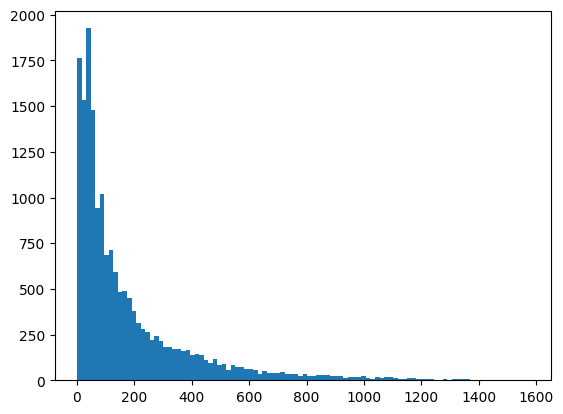

In [401]:
plt.hist(data['days_exposition'], bins=100)
plt.show()

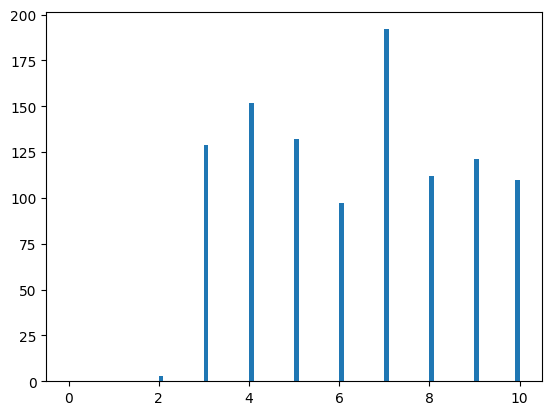

In [402]:
plt.hist(data['days_exposition'], bins=100, range=(0,10))
plt.show()

Лучше всего будет оставить пропуски в данном столбце. Есть предположение, что пропуск образовался из-за снятия объявление в тот же день продавцом из-за ошибок в объявлении или очень хорошей цены, что кто-то купил квартиру в этот же день. Если мы выставим 0, а на самом деле там окажутся объявления, которые висели больше одного дня, но по какой-то иной причине время для них все же не сохранилось в этом столбце - мы можем исказить данные.

Столбец rooms. Проверка значения 0. Есть предположение, что эти квартиры являются студиями

In [403]:
print(len(data[(data['rooms']==0)&(data['studio']==True)]))
print(len(data[data['rooms']==0]))

131
188


131 из 188 квартир являются студией, заменим значения на 1.

In [404]:
# замена значений комнат 0 у столбца студии на 1 
data.loc[(data['rooms']==0)&(data['studio']==True), 'rooms'] = 1

In [405]:
print(len(data[(data['rooms']==0)&(data['studio']==True)]))
print(len(data[data['rooms']==0]))

0
57


Осталось 57 значений, изучим их

In [406]:
data[data['rooms']==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 349 to 23592
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          57 non-null     int64  
 1   last_price            57 non-null     float64
 2   total_area            57 non-null     float64
 3   first_day_exposition  57 non-null     object 
 4   rooms                 57 non-null     int64  
 5   ceiling_height        57 non-null     float64
 6   floors_total          57 non-null     float64
 7   living_area           54 non-null     float64
 8   floor                 57 non-null     int64  
 9   is_apartment          57 non-null     object 
 10  studio                57 non-null     bool   
 11  open_plan             57 non-null     bool   
 12  kitchen_area          0 non-null      float64
 13  balcony               57 non-null     float64
 14  locality_name         57 non-null     object 
 15  airports_nearest      30 

У всех отсутствует площадь кухни, можно предположить, что это тоже студии. Заменим остатки значений комнат на 1 и поставим True в столюце studio

In [407]:
data.loc[(data['rooms']==0)&(data['studio']==False), 'studio'] = True
data.loc[(data['rooms']==0)&(data['studio']==True), 'rooms'] = 1
print(len(data[data['rooms']==0]))
data['rooms'].value_counts()

0


rooms
1     7005
2     6505
3     4814
4     1025
5      302
6       98
7       57
8       11
9        7
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: count, dtype: int64

Проверим столбец locality_name на неявные дубликаты, невооруженым взглядом были обнаружены поселки в названии использующие буквы Е и Ё

Создадим функцию для чистки данных, она будет убирать все слова до встречи с заглавной буквой названия поселения

In [408]:
len(data['locality_name'].unique())

344

In [409]:
def locality(data):
    for i in data.split():
        if i == i.title():
            return i 

In [410]:
data['locality_name'] = data['locality_name'].apply(locality)
len(data['locality_name'].unique())

286

Мы сократили количество уникальных населенных пунктов до 286 штук.

Преобразуем столбце first_day_exposition в формат datatime и создадим 3 столбца со значениями дня месяца и года выставления объявления. Они нам понадобяться позже.

In [411]:
# добавим столбик с показателем дня недели, месяца и год публикации и преобразуем столбец first_day_exposition в формат datatime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['data_publication'] = data['first_day_exposition'].dt.strftime('%Y-%m-%d %A')
data['weekday'] = data['first_day_exposition'].dt.strftime('%A')
data['month'] = data['first_day_exposition'].dt.strftime('%B')
data['year'] = data['first_day_exposition'].dt.year

Заключение: 

* Мы избавились от пропусков в столбцах balcony, floors_total и city_centers_nearest, 
* нашли и исправили некорректные значения в стоблцах rooms, ceiling_height, cityCenters_nearest, parks_around3000, ponds_around3000, kitchen_area и is_apartament
* нашли неявные дубликаты в столбце locality_name
* исправили некорректные названия столбцов cityCenters_nearest, parks_around3000, ponds_around3000
* преобразовали столбец first_day_exposition к формату datetime - это изменение пригодится в дальнейшем ходе исследования.

## Расчёты и добавление результатов в таблицу

In [412]:
# добавим столбец: цена за квадратный метр
data['price_per_meter'] = (data['last_price']/data['total_area']).astype(int)

In [413]:
# категорезируем квартиры по этажу: первый, последний, другой, неизвестно(если нет значения в столбце количества этажей)
def floor(data):
    if data['floor']==1:
        return 'first_floor'
    elif (data['floor']/data['floors_total'])==1:
        return 'last_floor'
    else:
        return 'other'
    
data['floor_category']= data.apply(floor, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,data_publication,weekday,month,year,price_per_meter,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,-1,...,482.0,2.0,755.0,NaN,2019-03-07 Thursday,Thursday,March,2019,120370,other
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,-1,...,NaN,0.0,NaN,81.0,2018-12-04 Tuesday,Tuesday,December,2018,82920,first_floor
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,-1,...,90.0,2.0,574.0,558.0,2015-08-20 Thursday,Thursday,August,2015,92785,other
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,-1,...,84.0,3.0,234.0,424.0,2015-07-24 Friday,Friday,July,2015,408176,other
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,-1,...,112.0,1.0,48.0,121.0,2018-06-19 Tuesday,Tuesday,June,2018,100000,other


In [414]:
# добавим к квартирам свободной планировки соотношение жилой и общей площади
def living_area(data):
    total = data['total_area']
    living = data['living_area']
    return total/living
data['relation_living'] = data.apply(living_area, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,data_publication,weekday,month,year,price_per_meter,floor_category,relation_living
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,-1,...,2.0,755.0,NaN,2019-03-07 Thursday,Thursday,March,2019,120370,other,2.117647
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,-1,...,0.0,NaN,81.0,2018-12-04 Tuesday,Tuesday,December,2018,82920,first_floor,2.172043
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,-1,...,2.0,574.0,558.0,2015-08-20 Thursday,Thursday,August,2015,92785,other,1.632653
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,-1,...,3.0,234.0,424.0,2015-07-24 Friday,Friday,July,2015,408176,other,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,-1,...,1.0,48.0,121.0,2018-06-19 Tuesday,Tuesday,June,2018,100000,other,3.125000


In [415]:
# добавим столбик к квартирам свободной планировки отношение площади кухни к общей
def kitchen_area(data):
    if data['kitchen_area']!=0:
        total = data['total_area']
        kitchen = data['kitchen_area']
        return total/kitchen
data['relation_kitchen'] = data.apply(kitchen_area, axis=1)
data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,data_publication,weekday,month,year,price_per_meter,floor_category,relation_living,relation_kitchen
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,-1,...,755.0,NaN,2019-03-07 Thursday,Thursday,March,2019,120370,other,2.117647,4.320000
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,-1,...,NaN,81.0,2018-12-04 Tuesday,Tuesday,December,2018,82920,first_floor,2.172043,3.672727
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,-1,...,574.0,558.0,2015-08-20 Thursday,Thursday,August,2015,92785,other,1.632653,6.746988
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,-1,...,234.0,424.0,2015-07-24 Friday,Friday,July,2015,408176,other,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,-1,...,48.0,121.0,2018-06-19 Tuesday,Tuesday,June,2018,100000,other,3.125000,2.439024


Заключение:

Мы создали новые столбцы, значения для которых вычислили на основе имеющихся данных:
* price_per_meter - стоимость за квадратный метр жилья
* weekday, month, year - день недели, месяц, год когда объявление было впервые размещено
* floor_category - категория этажа
* relation_living - отношение жилой площади к общей
* relation_kitchen - отношение площади кухни к общей площади

## Исследовательский анализ данных

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Изучим столбец total_area

In [416]:
data['total_area'].describe()

count    19835.000000
mean        62.134022
std         36.853160
min         12.000000
25%         40.300000
50%         53.720000
75%         72.000000
max        900.000000
Name: total_area, dtype: float64

Минимальная площадь 12 кадратов, это что-то очень меленькое для квартиры, а самое большое 900, учитывая среднее значение в 60 м2 это очень много. Посмотрим, что это за объекты 

In [417]:
display(data[data['total_area']==900])
display(data[data['total_area']==12])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,data_publication,weekday,month,year,price_per_meter,floor_category,relation_living,relation_kitchen
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,-1,...,318.0,106.0,2017-12-06 Wednesday,Wednesday,December,2017,466666,last_floor,2.196729,8.035714


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,data_publication,weekday,month,year,price_per_meter,floor_category,relation_living,relation_kitchen
19904,4,2400000.0,12.0,2017-07-19,1,2.55,5.0,10.0,2,-1,...,45.0,200.0,2017-07-19 Wednesday,Wednesday,July,2017,200000,other,1.2,NaN


12 комнат и последний 25 этаж, выглядит как шикарный пентхаус. Оставим значение.
А маленькое помещение в 12 квадратов выглядит как комната в комуналке, тоже оставим

Посмотрим как распределены значения площади квартир на гистограмме.

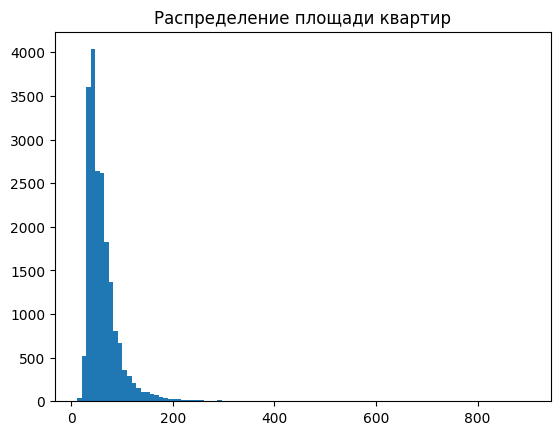

In [418]:
plt.hist(data['total_area'], bins=100,)
plt.title('Распределение площади квартир')
plt.show()

Очень большой хвост справа. Небольшое количество значений, которые сильно выбиваются из общей выборки. Квартиры с площадью более 250 кв.м  редкость.

Посмотрим диаграмму размаха

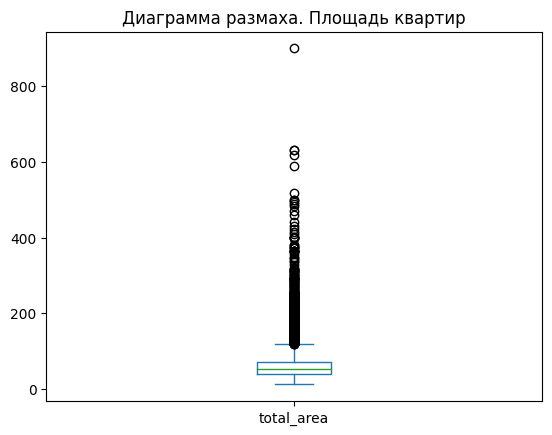

In [419]:
data['total_area'].plot(kind='box')
plt.title('Диаграмма размаха. Площадь квартир')
plt.show()

На диаграмме размаха можно увидеть длинный хвост из выбросов.
Такие выброс могут сильно искажать средние показатели по выборке.
Ограничим нашу выборку максимальной площадью в 200м2. Проверим сколько данных мы таким образом потеряем.

In [420]:
count_del_area = len(data)-len(data.query('total_area<=200'))
print('Количество потерянных значений:',  count_del_area)
print(count_del_area/len(data['total_area'])*100)

Количество потерянных значений: 204
1.0284850012603983


In [421]:
data = data.query('total_area<=200')

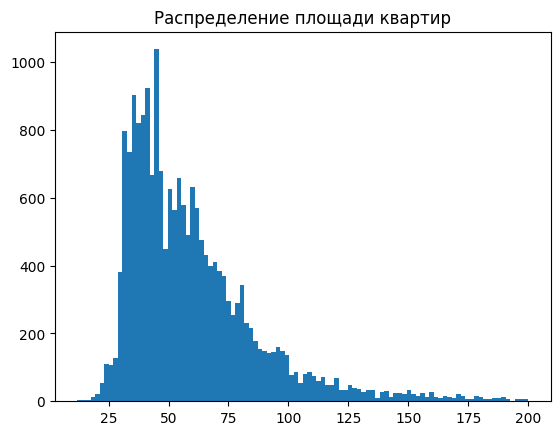

In [422]:
plt.hist(data['total_area'], bins=100,)
plt.title('Распределение площади квартир')
plt.show()

In [423]:
data['total_area'].describe()

count    19631.000000
mean        59.838910
std         27.648813
min         12.000000
25%         40.100000
50%         53.000000
75%         71.800000
max        200.000000
Name: total_area, dtype: float64

Краткое резюме:

* Средняя площадь объектов, находящихся в выборке составляет: 53 кв.м (на основании медианы)
* Минимальная площадь жилого объекта, из представленных в выборке: 12 кв.м.
* Максимальная площадь жилого объекта, из представленных в выборке: 200 кв.м.
* 98.98% объектов выборки имеют площадь в диапазоне [12.0 кв.м., 200 кв.м.]

Провери столбец last_price

In [424]:
data['last_price'].describe()

count    1.963100e+04
mean     6.358217e+06
std      6.603869e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.800000e+06
75%      7.099000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [425]:
data[data['last_price']==12190]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,data_publication,weekday,month,year,price_per_meter,floor_category,relation_living,relation_kitchen
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,-1,...,NaN,8.0,2019-03-20 Wednesday,Wednesday,March,2019,111,last_floor,3.40625,2.691358


Общая площадь объекта, который выставлен за 12190р - 109 кв.м. Можем предположить, что данную цену заказчик выставил для привлечения внимания, не дописав 3 нуля.

In [426]:
data['last_price'] = data['last_price'].drop(data[data['last_price']==12190].index)

In [427]:
data['last_price'].describe()

count    1.963000e+04
mean     6.358540e+06
std      6.603882e+06
min      4.300000e+05
25%      3.500000e+06
50%      4.800000e+06
75%      7.099000e+06
max      3.300000e+08
Name: last_price, dtype: float64

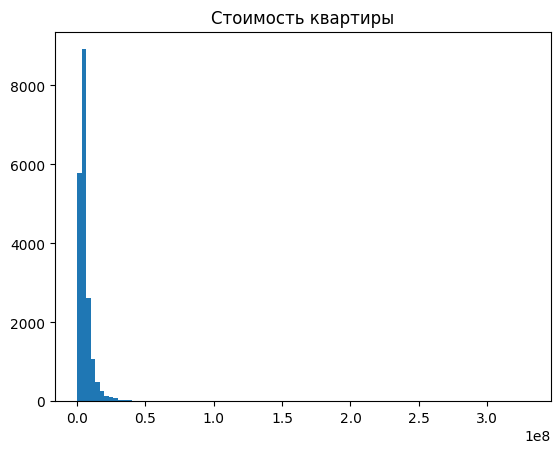

In [428]:
plt.hist(data['last_price'], bins=100)
plt.title('Стоимость квартиры')
plt.show()

In [429]:
print('Количество потерянных значений:',len(data)-len(data.query('last_price<=25000000')))

Количество потерянных значений: 296


In [430]:
count_del_price = len(data)-len(data.query('last_price<=25000000'))
print('Количество потерянных значений:',  count_del_price)
print(count_del_price/len(data['last_price'])*100)

Количество потерянных значений: 296
1.5078192654475064


Примем верхнюю границу стоимости в 25 млн. руб. - все, что выше, может являться некорректным значением либо единичными случаями элитной недвижимости.

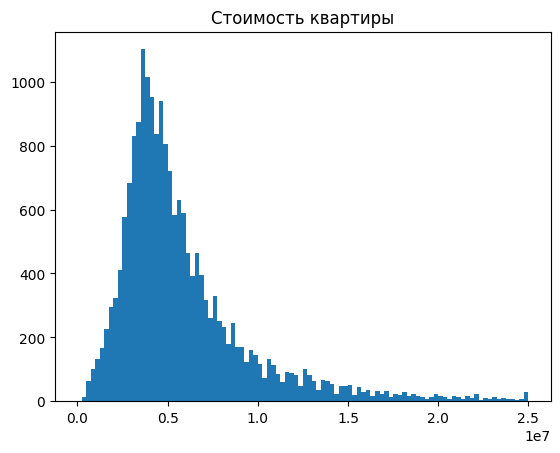

In [431]:
plt.hist(data['last_price'], bins=100, range=(0, 25000000))
plt.title('Стоимость квартиры')
plt.show()


In [432]:
data = data.query('last_price <=25000000')

In [433]:
data['last_price'].describe()

count    1.933500e+04
mean     5.830638e+06
std      3.732148e+06
min      4.300000e+05
25%      3.500000e+06
50%      4.792000e+06
75%      6.950000e+06
max      2.500000e+07
Name: last_price, dtype: float64

Краткое резюме:

* Средняя стоимость объектов, находящихся в выборке составляет: 4,792,000 р (на основании медианы)
* Минимальная стоимость жилого объекта, из представленных в выборке: 430,000 р. (с учетом того, что мы исключили из данных объект стоимостью 12190р и площадью 109 кв.м.)
* Максимальная стоимость жилого объекта, из представленных в выборке: 25,000,000 р.
* 98.5% объектов выборки имеют стоимость в диапазоне [430,000р. , 25,000,000р. ]

Проверим столбец rooms

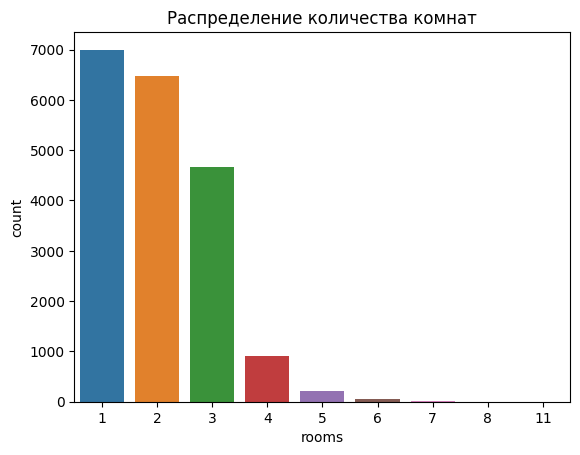

In [434]:
sns.countplot(x=data['rooms'])
plt.title('Распределение количества комнат')
plt.show()

In [435]:
count_del_rooms = len(data)-len(data.query('rooms<=6'))
print('Количество потерянных значений:',  count_del_rooms)
print(count_del_rooms/len(data['last_price'])*100)

Количество потерянных значений: 21
0.10861132660977503


In [436]:
print('Количество потерянных значений:',len(data)-len(data.query('rooms<=6')))
data = data.query('rooms<=6')
data['rooms'].value_counts()

Количество потерянных значений: 21


rooms
1    6997
2    6471
3    4664
4     910
5     219
6      53
Name: count, dtype: int64

In [437]:
data['rooms'].describe()

count    19314.000000
mean         2.018432
std          0.968446
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Краткое резюме:

* Средняя количество комнат объектов, находящихся в выгрузке составляет: 2
* Минимальное количество комнат жилого объекта, из представленных в выгрузке: 0
* Максимальное количество комнат жилого объекта, из представленных в выборке: 11
* 50% объектов недвижимости, представленных в выгрузке имеют от 1-й до 3-х комнат
* 99,9% квартир, представленных в выгрузке имеют от 1-й до 6-и комнат.

Анализ столбца ceiling_height

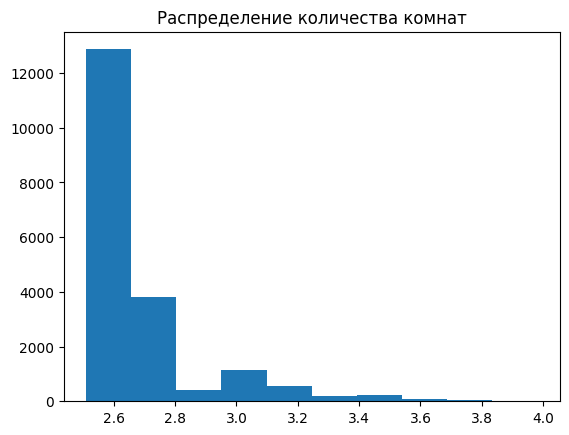

In [438]:
plt.hist(data['ceiling_height'], bins=10) 
plt.title('Распределение количества комнат')
plt.show()

In [439]:
data['ceiling_height'].describe()

count    19314.000000
mean         2.719146
std          0.184847
min          2.510000
25%          2.650000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

Краткое резюме:

Так как мы ранее уже почистили данные по высоте потолков, получились такие результаты:

* Средняя высота потолков составляет: 2,65м 
* Минимальная и максимальная высота составляет - 2,51 и 3,98м соотвественно.
* 50% объектов недвижимости, представленных в выгрузке имеют высоту потолков от 2,65м до 2,7м

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [440]:
data['days_exposition'].describe()

count    16955.000000
mean       180.521085
std        218.959293
min          2.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1553.000000
Name: days_exposition, dtype: float64

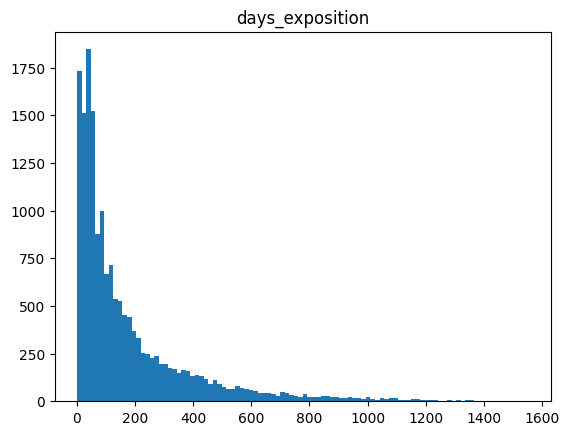

In [441]:
plt.hist(data['days_exposition'], bins=100)
plt.title('days_exposition')
plt.show()

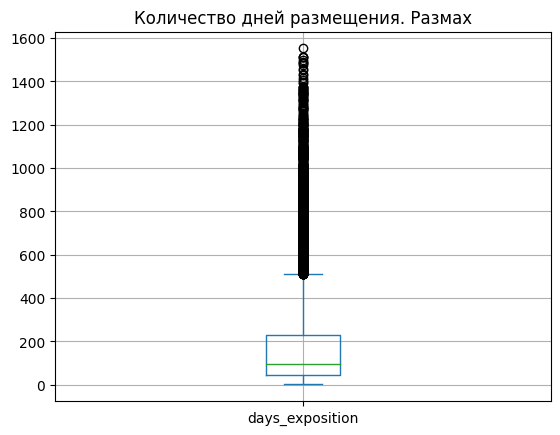

In [442]:
data['days_exposition'].plot(kind='box', grid=True)
plt.title('Количество дней размещения. Размах')
plt.show()

Выбросы с высокими значениями сроков продажи сильно смещают среднее арифметическое в большую сторону. С таким количеством выбросов сложно оценить общую тенденцию, которой бы характеризовалась большая часть данных, зададим верхние значенме 500 и нижние значение 0, которые бы исключали выбросы.

In [443]:
count_del_days = len(data)-len(data.query('days_exposition<=500'))
print('Количество потерянных значений:',  count_del_days)
print(count_del_days/len(data['days_exposition'])*100)

Количество потерянных значений: 3790
19.62307134720928


In [444]:
data = data.query('days_exposition<=500')
data['days_exposition'].describe()

count    15524.000000
mean       127.264623
std        119.068759
min          2.000000
25%         42.000000
50%         85.000000
75%        181.000000
max        500.000000
Name: days_exposition, dtype: float64

Среднее время срока продажи квартиры составляет сократилось со 180 до 128 дней. Медианное время сократилось с 95 до 85 дней.
Несмотря на то, что стандартное отклонение осталось по прежнему высоким, оно уже не превышает показатель среднего арифметического.

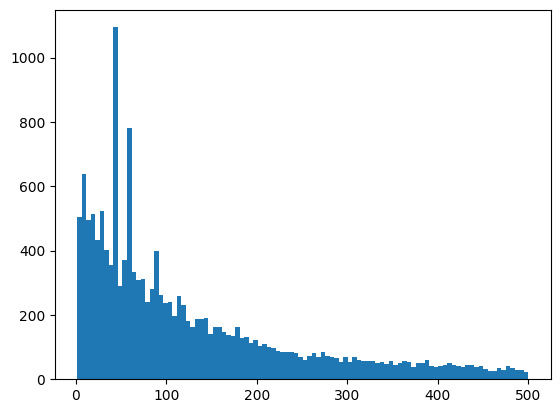

In [445]:
plt.hist(data['days_exposition'], bins=100)
plt.show()

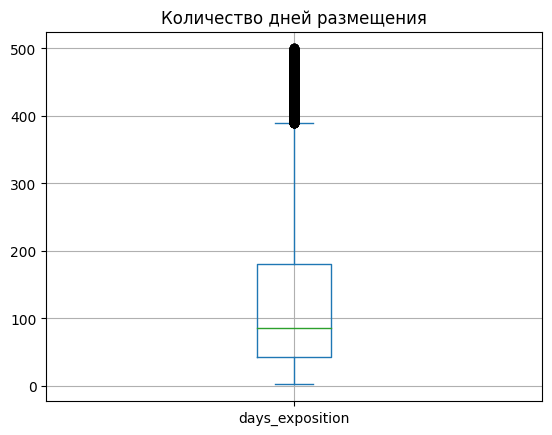

In [446]:
data['days_exposition'].plot(kind='box', grid=True)
plt.title('Количество дней размещения')
plt.show()

Здесь мы можем пронаблюдать верхнюю границу интерквантильного разсаха для навшего среза данных - 400 дней. Будем считать, что все, что расположено выше данной границы - "слишком долго".
50% значений срока продажи у нас расположены в диапазоне от 0 до 85 дней, остальные 50% - от 85 до 500. Отсюда и такое высокое значение стандартного отклонения.

Заключение:

* Можно утверждать, что в среднем продажа занимает от 85 до 128 дней.
* Если продажа заняла менее 42 дня - продажа прошла на удивление быстро.
* Если продажа заняла более 400 дней, можно полагать что продажа действительно затянулась 

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Изучим, зависит лт цена от площади.

In [447]:
data['last_price'].corr(data['total_area'])

0.7739534918029353

Коэффициент Пирсона 0,77 говорит о том, что действительно корреляция между ценой и площадью.

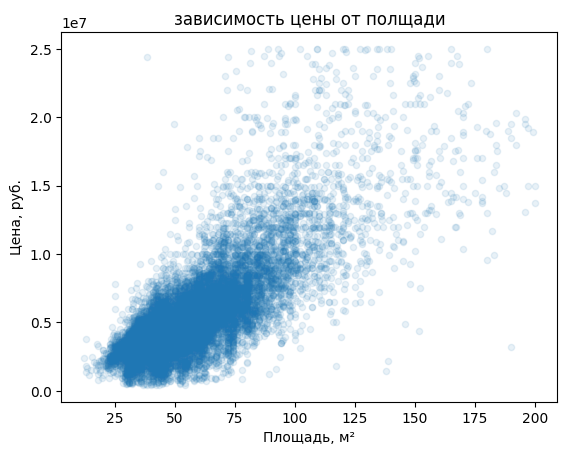

In [448]:
# график зависимости цены от площади
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)
plt.title('зависимость цены от полщади')
plt.xlabel('Площадь, м²')
plt.ylabel('Цена, руб.')
plt.show()

Отчетливо видно, что точки плотно концентрируются на графике, и выстраиваются в линию.

Присутствует положительная корреляция между площадью и ценой объекта недвижимости, Наиболее тесная связь наблюдается в диапазоне площади 20-115 кв.м, при стоимости недвижимости от 1-го до 12-и млн.р.

Проверим зависимость количества комнат от цены.

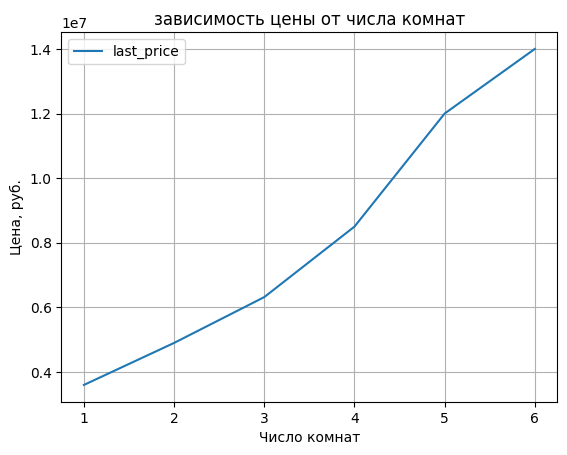

In [449]:
# график зависимости цены от числа комнат
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(grid=True)
plt.title('зависимость цены от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Цена, руб.')
plt.show()

In [450]:
data['rooms'].corr(data['last_price'])

0.5112227389104581

Заключение:

Стоимость объекта недвижимости зависит от количества комнат. Не смотря на низкий показатель линейной корреляции Пирсона (0,51), можно утверждать, что чем больше комнат, тем в среднем для объекта будет выше стоимость.

Зависимость цены от удаленности от центра

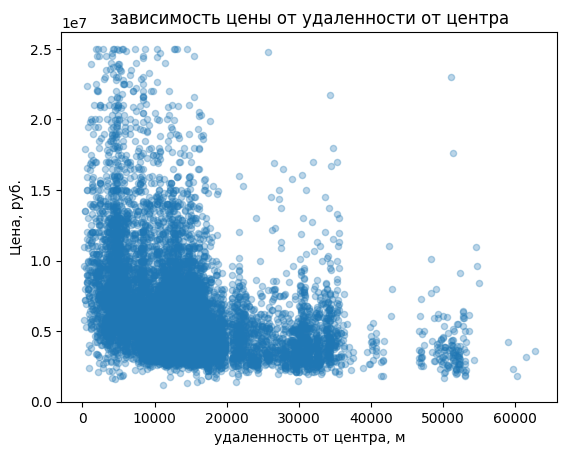

In [451]:
# график зависимости цены от удаленности от центра
data.plot(x='city_centers_nearest', y='last_price', kind='scatter', alpha=0.3)
plt.title('зависимость цены от удаленности от центра')
plt.xlabel('удаленность от центра, м')
plt.ylabel('Цена, руб.')
plt.show()

На графике видны 3 основных пика. Такое может быть, когда есть какие то 3 группы данных, объединенных каким-то единым признаком. 3 группы данных, в каждой из которых данные распределены нормально.

Посмотрим на коэффициент линейной корреляции Пирсона

In [452]:
data['city_centers_nearest'].corr(data['last_price'])

-0.3447566710721893

Посмотрим как выглядит на графике разброса линия тренда.

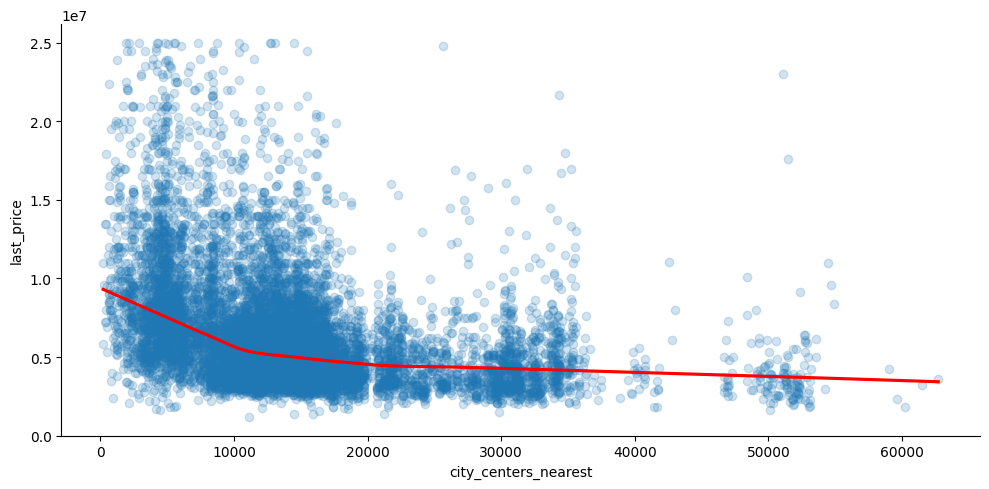

In [453]:
sns.lmplot(data=data,
           x='city_centers_nearest',
           y='last_price',
           lowess=True,
           scatter_kws={'alpha':0.2},
           line_kws={'color':'red'},
           aspect=2)
plt.show()

Заключение:

Не смотря на то, что коэффициент линейной регрессии низкий (-0,34) и не смотря на высокий разброс значений на графике, можно утверждать, что взаимосвязь между отдаленностью от центра и стоимостью присутсвует. Однако она нелинейная. По мере удаление от центра на дистанцию до 10000м стоимость снижается сначительно быстрее, нежели при удалении на дистанцию от 10000м и далее.

Изучение зависимости цены от этажа

Посмотрим распределение внутри категориц этажности

In [454]:
data['floor_category'].value_counts()

floor_category
other          11732
last_floor      2007
first_floor     1785
Name: count, dtype: int64

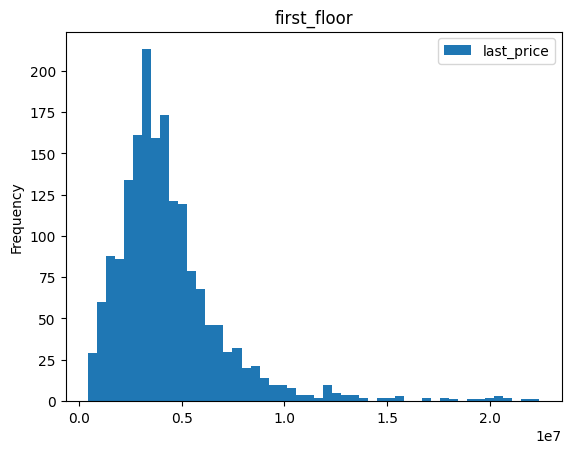

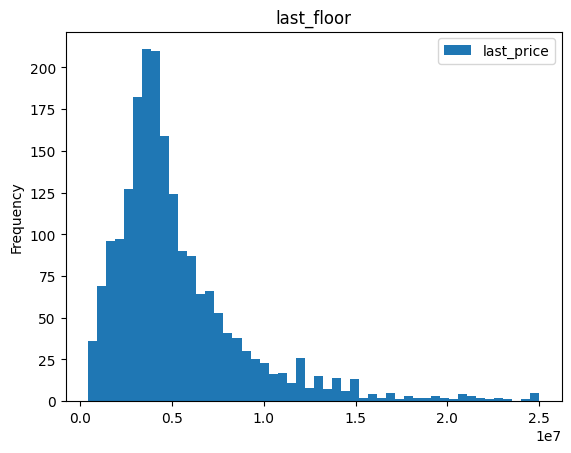

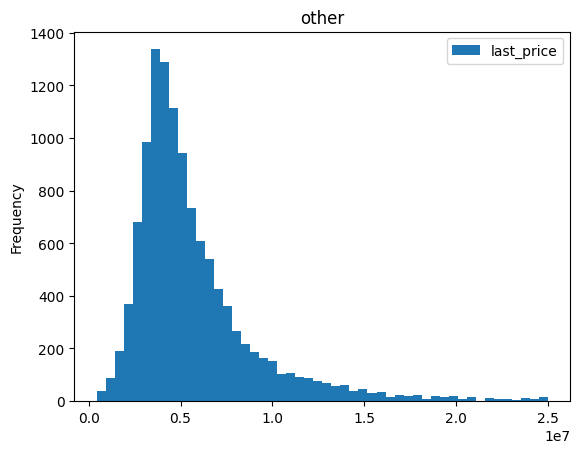

In [455]:
for category, grouped in data.groupby('floor_category'):
    grouped.plot(y='last_price', kind='hist', title=category, bins=50)

Создадим сводную таблицу, в которой для каждой категории этажа подсчитаем медианное значение стоимости.

In [456]:
data.pivot_table(index='floor_category', 
                values='last_price', 
                aggfunc='median')

,last_price
floor_category,
first_floor,3880000.0
last_floor,4300000.0
other,4750000.0


Видно, что цена квартир расположенных на последнем этаже выше, нежели цена квартир, расположенных на последнем этаже, а цена квартир, расположенных на ином этаже выше этих двух цен.

Построим свобдную таблицу, в которой отобразим медианное значение цены для каждой категории этажа внутри каждого года.



In [457]:
data_sorted = data.pivot_table(index='floor_category',
                columns='year',
                values='last_price', 
                 aggfunc='median')
data_sorted

year,2015,2016,2017,2018,2019
floor_category,,,,,
first_floor,4000000.0,3885000.0,3900000.0,3800000.0,4000000.0
last_floor,4100000.0,4350000.0,4125767.0,4500000.0,5050000.0
other,5100000.0,4700000.0,4670000.0,4775000.0,5200000.0


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)


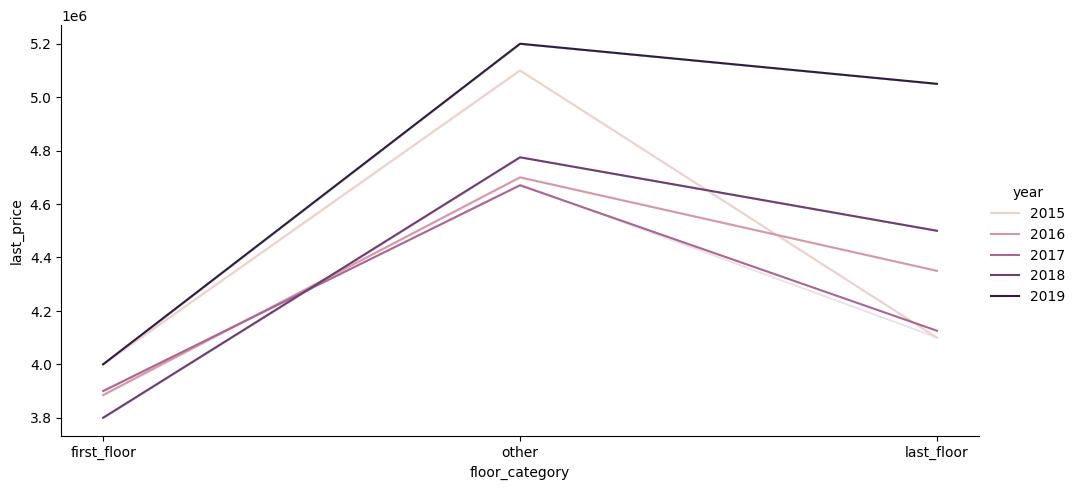

In [458]:
sns.relplot(data=data, 
            x='floor_category', 
            y='last_price', 
            hue='year', 
            kind='line',
            legend='full',
            aspect=2,
            estimator=np.median,
            ci=False)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)


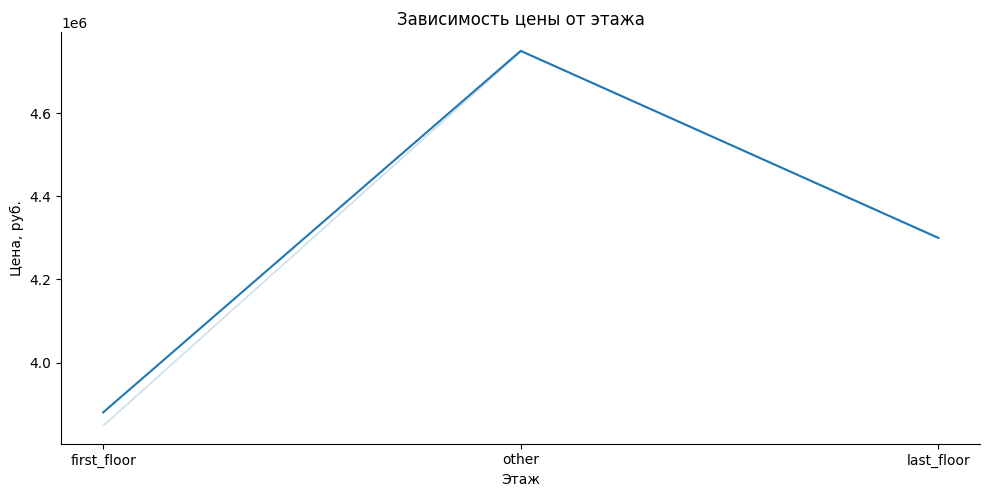

In [459]:
# график зависимости цены от этажа
sns.relplot(data=data, x='floor_category', y='last_price', kind='line', aspect=2, ci=False, estimator=np.median)
plt.title('Зависимость цены от этажа') 
plt.suptitle('')
plt.xlabel('Этаж')
plt.ylabel('Цена, руб.')
plt.show()

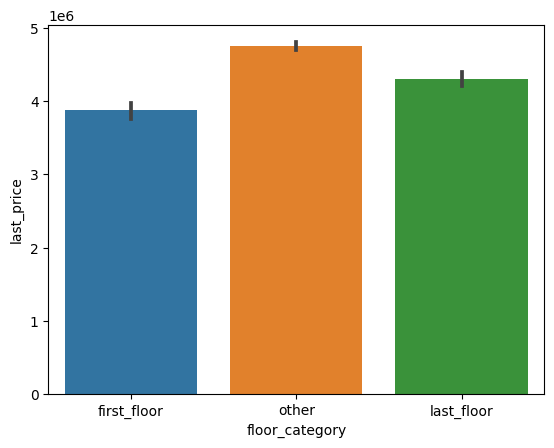

In [460]:
sns.barplot(x='floor_category', 
            y='last_price', 
            estimator=np.median,
            data=data)
plt.show()

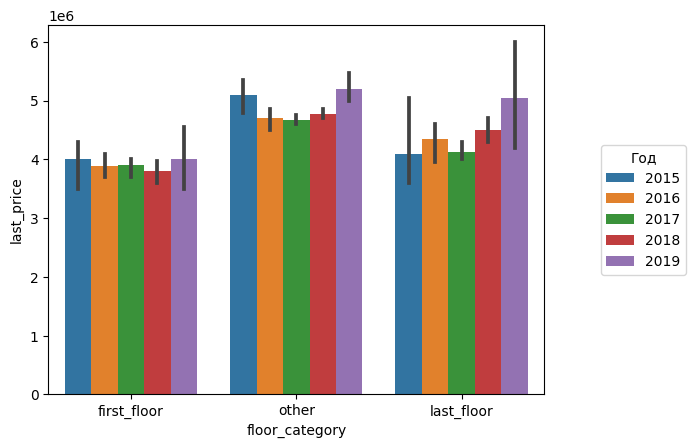

In [461]:
sns.barplot(x='floor_category', 
            y='last_price', 
            estimator=np.median,
            hue='year',
            data=data)
plt.legend(title='Год', loc='center right', bbox_to_anchor=(1.3,0.5)) #bbox расположение легенды
plt.show()

Заключение:

Зависимость между ценой квартиры и этажом, на котором она расположена присутствует.
Цена квартир, расположенных на последнем этаже в среднем выше, чем цена квартир расположенных на первом этаже. При этом цена квартир, расположенных на ином этаже выше этих двух цен.

Зависит ли цена от от даты размещения: дня недели, месяца и года.

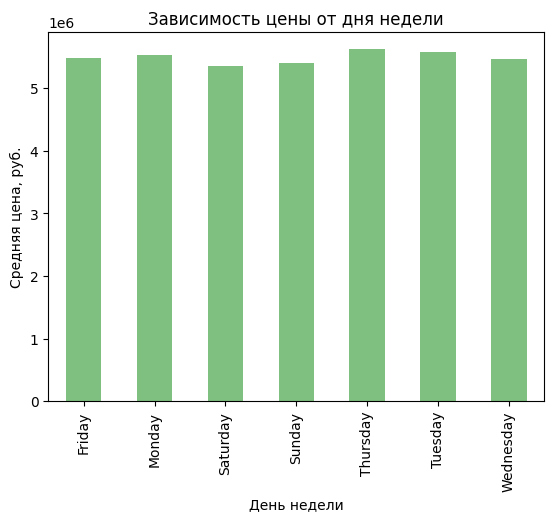

In [462]:
data.groupby('weekday')['last_price'].mean().plot(kind='bar', alpha=0.5, color='green')
plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Средняя цена, руб.')
plt.show()

Построим график изменения стоимости по дням недели, чтобы посмотреть, есть ли какой-то паттерн. Каждый месяц выделим отдельной линией графика, чтобы анализировать непосредственно то, как себя вела цена внутри данного месяца по дням недели.

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)


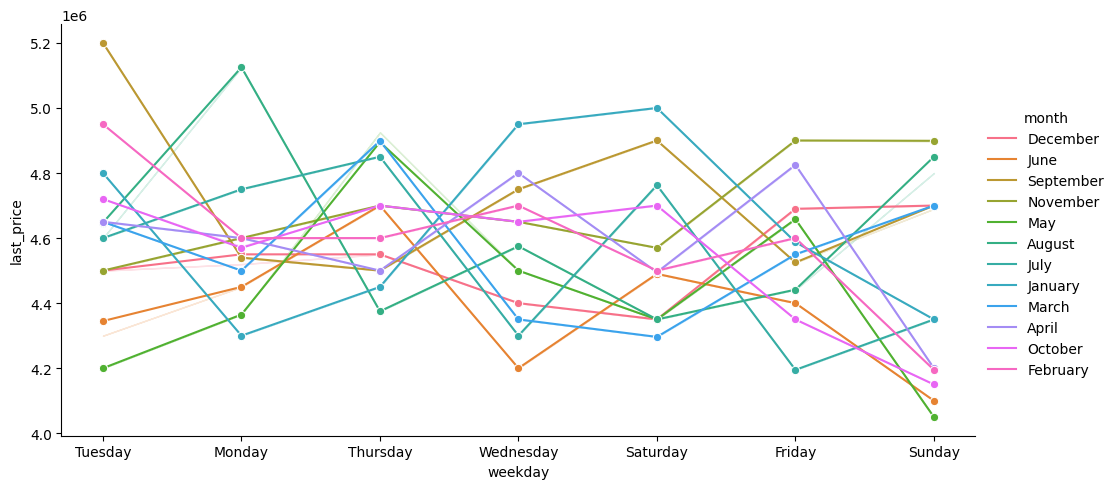

In [463]:
sns.relplot(data=data, 
            x='weekday', 
            y='last_price', 
            hue='month', 
            kind='line', legend='full',
            aspect=2,
            estimator=np.median, marker='o',
            ci=False)

Паттерн отсутствует. Если бы стоимость зависела от дня недели, то мы бы наблюдали на графике явное повышение или снижение цены в определенный промежутки времени внутри каждого месяца

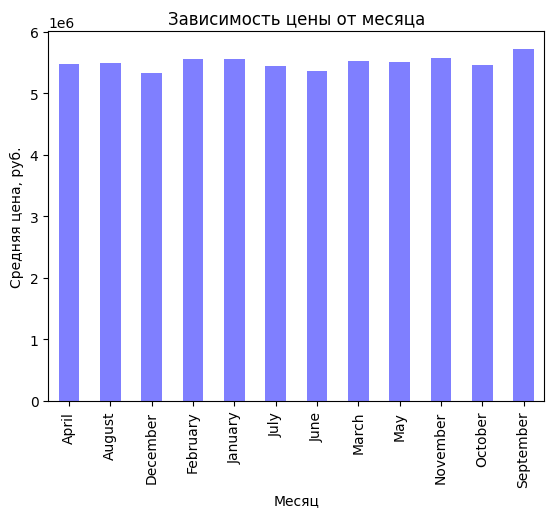

In [464]:
data.groupby('month')['last_price'].mean().plot(kind='bar', alpha=0.5, color='blue')
plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена, руб.')
plt.show()

Построим график изменения стоимости по месяцам, чтобы посмотреть, есть ли какой-то паттерн. Каждый год выделим отдельной линией графика, чтобы анализировать непосредственно то, как себя вела цена внутри данного года.

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)


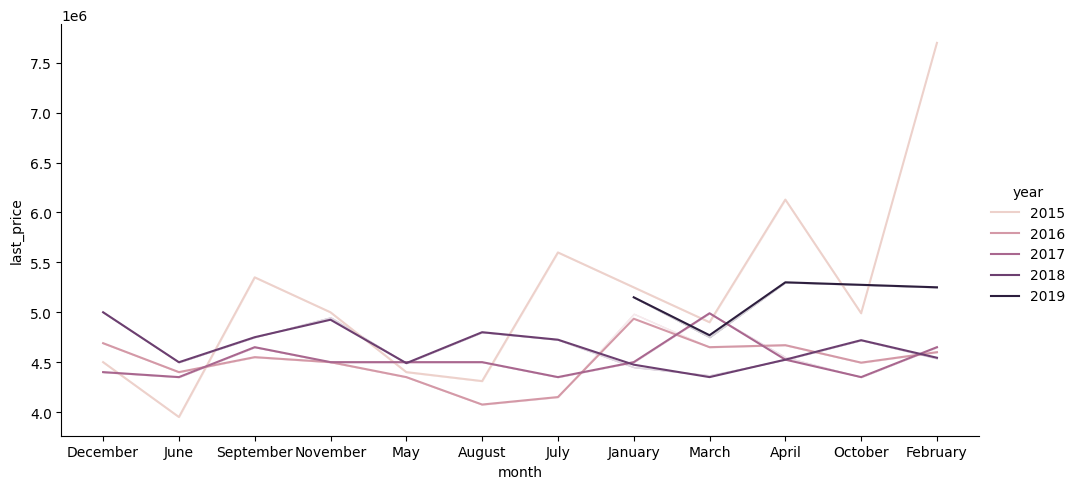

In [465]:
sns.relplot(data=data, 
            x='month', 
            y='last_price', 
            hue='year', 
            kind='line', 
            aspect=2,
            estimator=np.median,
            ci=False)
plt.show()

Паттерн отсутствует. Если бы стоимость зависела от месяца, то мы бы наблюдали на графике явное повышение или снижение цены в определенный промежутки времени внутри каждого года. Хотя 2015 был какой то аномальный год, в нем видны скачки с тенденцией повышения, видимо восстановление и рост недвижимости после кризиса 2014

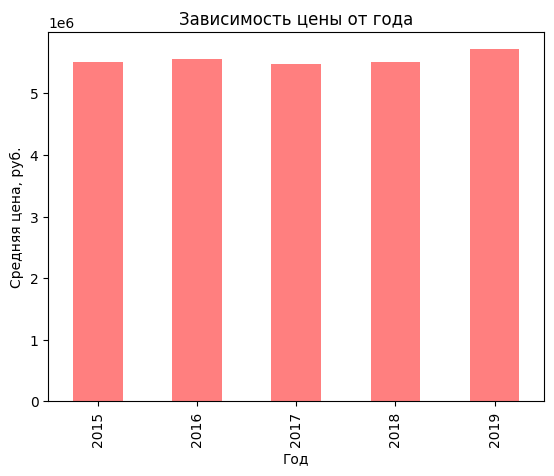

In [466]:
data.groupby('year')['last_price'].mean().plot(kind='bar', alpha=0.5, color='red')
plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Средняя цена, руб.')
plt.show()

Заключение:

На основании проведенного анализа, мы выявили, что:

* Стоимость недвижимости зависит от года, когда было выложено объявление. Это может быть связано с конкретной экономической ситуацией, присущей для каждого года.
* Стоимость недвижимости не зависит ни от дня недели, ни от месяца, когда было выложено объявление.

Вывод:

В данном разделе мы рассмотрели:

* Зависит ли цена от площади
* Зависит ли цена от числа комнат
* Зависит ли цена от удалённости от центра
* Зависит ли цена от того, на каком этаже расположена квартира: первом, последнем или другом.
* Зависит ли цена от даты размещения: дня недели, месяца и года.

На основании проведенного анализа, было выявлено, что:

* Цена недвижимости зависит от площади. Присутствует прямая линейная зависимость.
* Цена недвижимости зависит от числа комнат. Чем больше комнат, тем в среднем выше стоимость на недвижимость.
* Цена недвижимости зависит от удаленности от центра, однако зависимость нелинейна. При отдалении от центра на расстояние до 10000м цена падает быстрее, нежели при отдалении отцентра на расстояние от 10000м и далее.
* Цена недвижимости зависит от того, на каком этаже она расположена. "Цена квартиры на первом этаже" < "Цена квартиры на последнем этаже" < "Цена квартиры ином этаже".
* Цена недвижимости зависит от года размещения объявления, однако не зависит ни от дня недели, ни от месяца размещения.

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [467]:
# Выберем первые 10 населенных пунктов по количеству недвижимости
data_locality = data['locality_name'].value_counts().reset_index()
data_locality = data_locality.query('index<10')
display(data_locality)

,locality_name,count
0,Санкт-Петербург,10312
1,Мурино,503
2,Кудрово,399
3,Шушары,360
4,Всеволожск,281
5,Парголово,274
6,Пушкин,213
7,Колпино,205
8,Гатчина,191
9,Выборг,156


In [468]:
# уберем все невходящие в этот список 10 самых крупных городов из датафрейма
data['locality_name'] = data['locality_name'].where(data['locality_name'].isin(data_locality['locality_name']))
display(data.groupby('locality_name')['price_per_meter'].mean().sort_values(ascending=False).reset_index().round(0))
display(data.groupby('locality_name')['last_price'].mean().sort_values(ascending=False).reset_index().round(0))

,locality_name,price_per_meter
0,Санкт-Петербург,109180.0
1,Пушкин,102716.0
2,Кудрово,94455.0
3,Парголово,89469.0
4,Мурино,85821.0
5,Шушары,77725.0
6,Колпино,74629.0
7,Всеволожск,68893.0
8,Гатчина,67952.0
9,Выборг,57601.0


,locality_name,last_price
0,Санкт-Петербург,6495828.0
1,Пушкин,6061800.0
2,Парголово,4405362.0
3,Кудрово,4295010.0
4,Шушары,4098858.0
5,Колпино,3898948.0
6,Всеволожск,3745880.0
7,Мурино,3609556.0
8,Гатчина,3491173.0
9,Выборг,3094532.0


Наименьшая средняя стоимость квадратного метра (среди топ-10 город по количеству размещенных объявлений составляет): 
57600 руб/кв.м. 
Это средняя стоимость квадратного метра в городе: 
Выборг

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 

Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. 

Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 

После этого посчитайте среднюю цену для каждого километра. 

Постройте график: он должен показывать, как цена зависит от удалённости от центра. 

Определите границу, где график сильно меняется, — это и будет центральная зона.

Создадим срез данных, который будет включать квартиры, расположенные в Санкт-Петербурге. Удалим из него строки, в которых пропущено расстояние до центра.

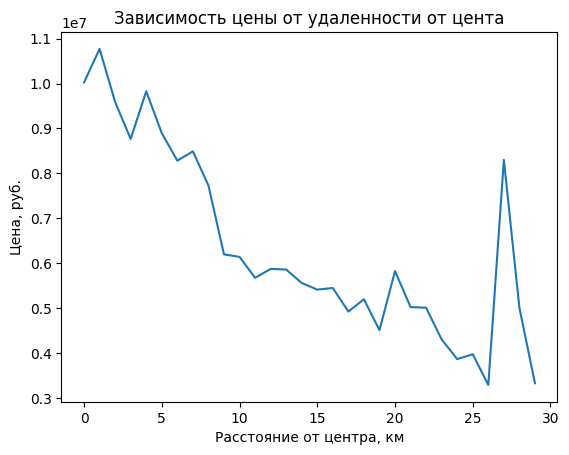

In [492]:
import math
data_spb = data.query('locality_name == "Санкт-Петербург"').dropna(subset=['city_centers_nearest'])
data_spb['city_centers_nearest'] = (data_spb['city_centers_nearest']/1000).astype(int)
data_spb.groupby('city_centers_nearest')['last_price'].mean().plot(kind='line')
plt.title('Зависимость цены от удаленности от цента')
plt.xlabel('Расстояние от центра, км')
plt.ylabel('Цена, руб.')
plt.show()

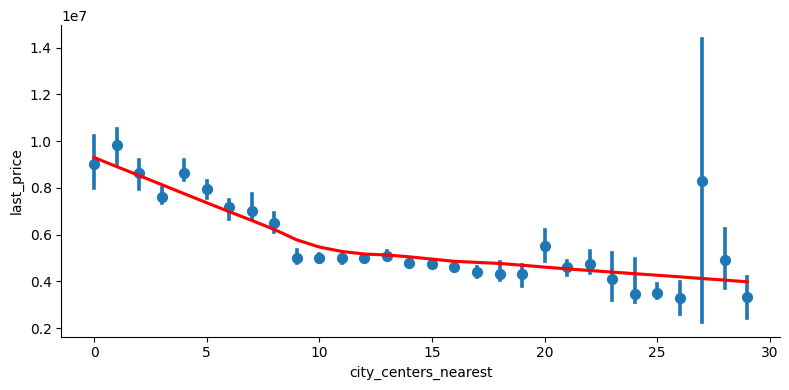

In [496]:
sns.lmplot(data=data_spb, x='city_centers_nearest', y='last_price', lowess=True, aspect=2, height=4, x_estimator=np.median, scatter_kws={'alpha':1}, line_kws={'color':'red'})

Хорошо заметно, что по мере приближения к центру от 30 до 11 километра цена растет достаточно плавно, в то время как начиная с 10 км виден сильный перелом, и скорость прироста цены увеличивается.

Можно предположить, что область от 0 до 10 км включительно входит в центр города.

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [500]:
data_spb_centre = data_spb.query('city_centers_nearest <= 10')
print('Объектов расположенно в центре', len(data_spb_centre))
print('Объектов расположенно на переферии', len(data_spb)-len(data_spb_centre))

Объектов расположенно в центре 3735
Объектов расположенно на переферии 6558


Объектов, расположенных на переферии Санкт-Петербурга примерно в 2 раза больше чем объектов, расположенных в центре города.

Площадь

count   3,735.0
mean       68.4
std        30.0
min        12.0
25%        45.0
50%        62.5
75%        84.7
max       197.2
Name: total_area, dtype: float64


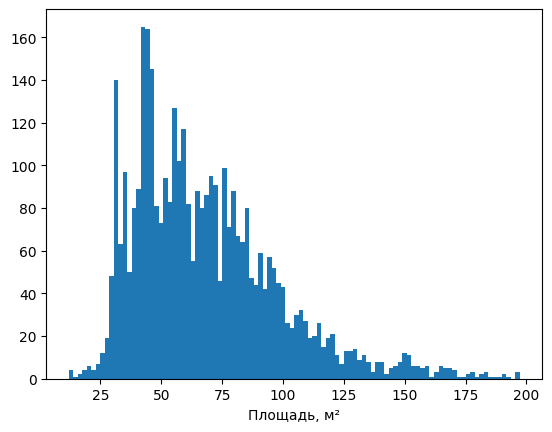

In [505]:
print(data_spb_centre['total_area'].describe())
# график зависимости цены от площади
plt.hist(data_spb_centre['total_area'], bins=100)
plt.xlabel('Площадь, м²')
plt.show()

Средняя площадь для Санкт-Петербурга составляет 68.4 кв.м, медианная площадь - 62.5 кв.м.

Цена

In [507]:
data_spb_centre['last_price'].describe()

count        3,735.0
mean     8,150,491.4
std      4,369,417.9
min      1,600,000.0
25%      4,999,500.0
50%      6,990,000.0
75%      9,999,500.0
max     25,000,000.0
Name: last_price, dtype: float64

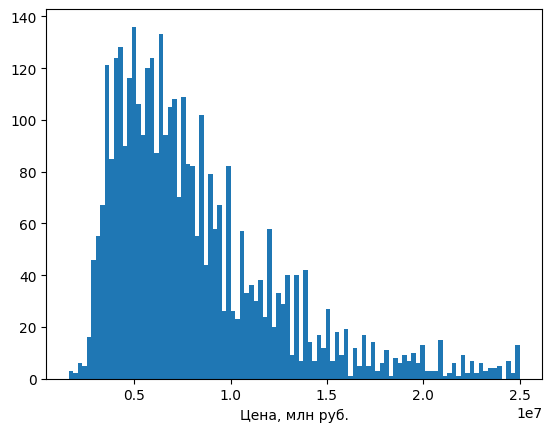

In [506]:
# график зависимости цены 
plt.hist(data_spb_centre['last_price'], bins=100)
plt.xlabel('Цена, млн руб.')
plt.show()

Средняя цена квартиры в центре 8,1 млн, при этом 50% квартир имеют цену ниже 7 мнл.

Число комнат

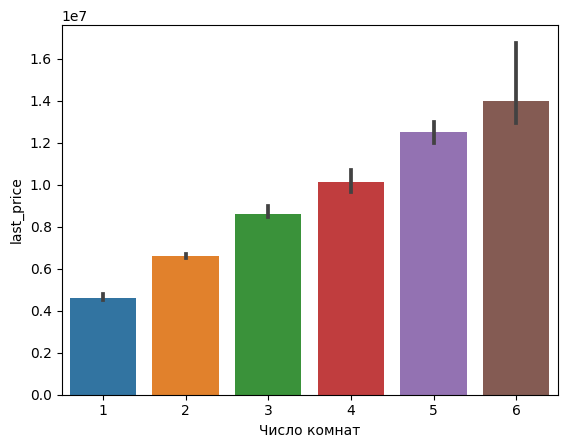

In [510]:
# график зависимости цены от количества комнат
sns.barplot(data=data_spb_centre, x='rooms', y='last_price', estimator=np.median )
plt.xlabel('Число комнат')
plt.show()

In [511]:
data_spb_centre['rooms'].value_counts()

rooms
2    1314
3    1058
1     927
4     314
5      96
6      26
Name: count, dtype: int64

По графику видно, что зависимость между ценой и количеством комнат прямая. Основная масса объявлений это: 1, 2 и 3-х комнатные квартиры

Высота потолков

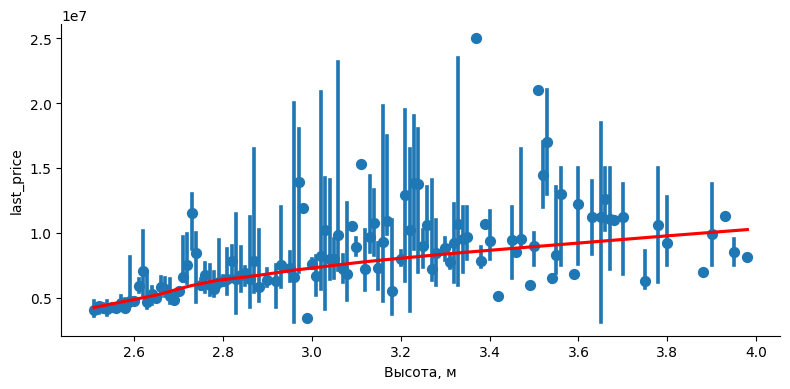

In [516]:
# график зависимости цены от высоты потолков
sns.lmplot(data=data_spb, x='ceiling_height', y='last_price', lowess=True, aspect=2, height=4, x_estimator=np.median, scatter_kws={'alpha':1}, line_kws={'color':'red'})
plt.xlabel('Высота, м')
plt.show()

In [517]:
data_spb_centre['ceiling_height'].value_counts()

ceiling_height
2.6    1638
3.0     416
2.7     186
2.8     168
2.6     139
       ... 
2.7       1
4.0       1
3.1       1
3.5       1
3.6       1
Name: count, Length: 107, dtype: int64

In [519]:
data_spb_centre.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'data_publication', 'weekday',
       'month', 'year', 'price_per_meter', 'floor_category', 'relation_living',
       'relation_kitchen'],
      dtype='object')

Цена плавно растет в зависимости от высоты потолков. В большенстве преобладают потолки 2,6 и 3 метра

Этаж

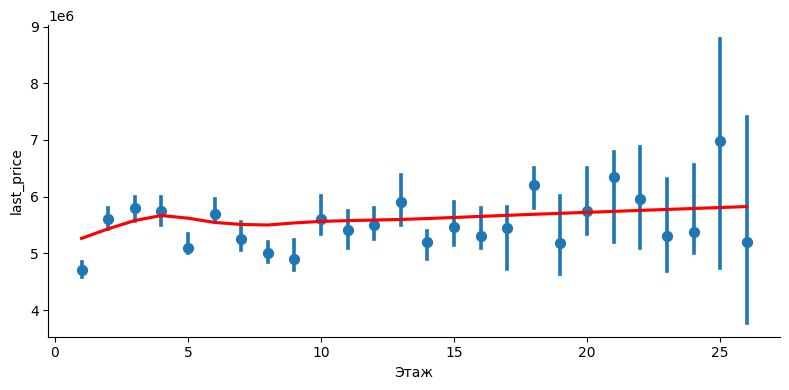

In [520]:
# график зависимости цены от этажа
sns.lmplot(data=data_spb, x='floor', y='last_price', lowess=True, aspect=2, height=4, x_estimator=np.median, scatter_kws={'alpha':1}, line_kws={'color':'red'})
plt.xlabel('Этаж')
plt.show()

Удаленность от центра

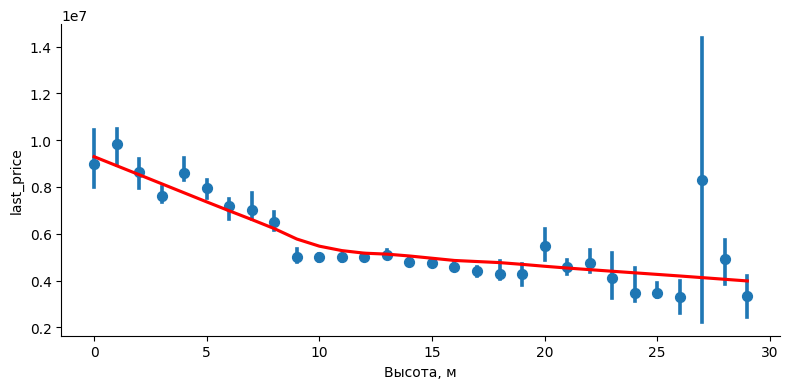

In [521]:
# график зависимости цены от удаленности от центра
sns.lmplot(data=data_spb, x='city_centers_nearest', y='last_price', lowess=True, aspect=2, height=4, x_estimator=np.median, scatter_kws={'alpha':1}, line_kws={'color':'red'})
plt.xlabel('Высота, м')
plt.show()

Дата размещения объявления

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)


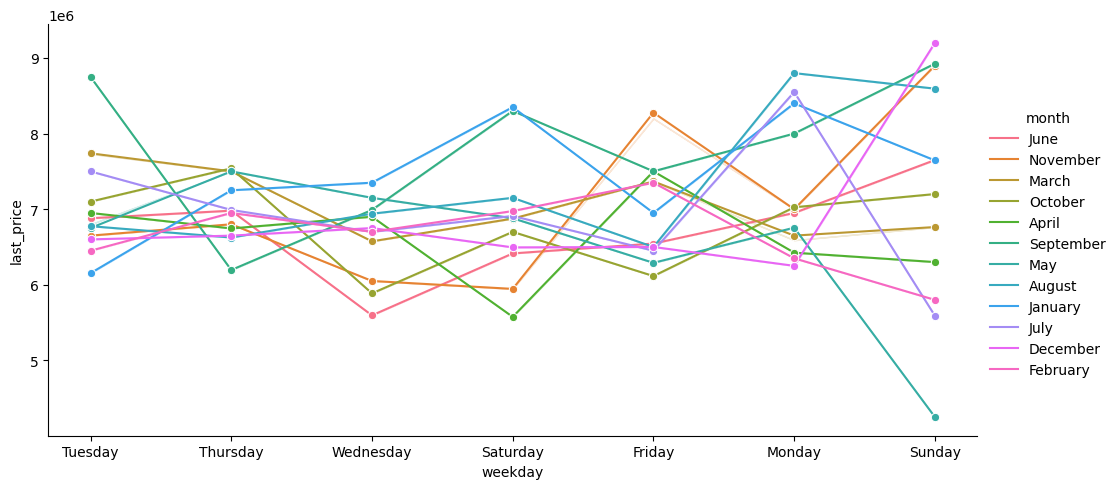

In [541]:
sns.relplot(data=data_spb_centre, 
            x='weekday', 
            y='last_price', 
            hue='month', 
            kind='line', legend='full',
            aspect=2,
            estimator=np.median, marker='o',
            ci=False)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)


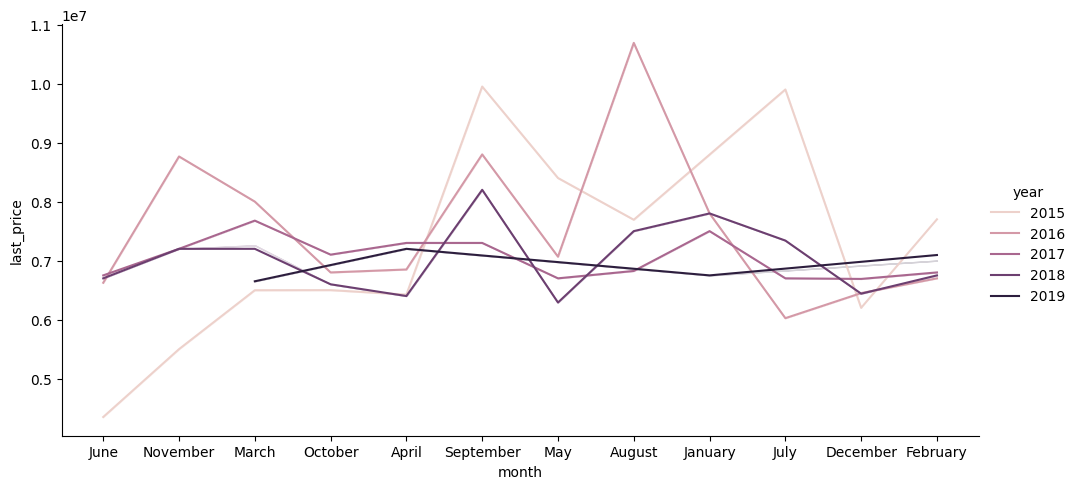

In [549]:
sns.relplot(data=data_spb_centre, 
            x='month', 
            y='last_price', 
            hue='year', 
            kind='line', 
            legend='full',
            aspect=2,
            estimator=np.median,
            ci=False)

Паттерн отсутствует. Если бы стоимость зависела от дня недели, то на графике явно было бы заметно однзначное повышение или снижение цены в определенный промежутки времени внутри каждого месяца. Такого поведения мы не наблюдаем. Следовательно, можно сделать вывод, что стоимость недвижимости не зависит от дня недели, месяца или года, когда было выложено объявление

Вывод:

В данном разделе мы рассмотрели влияние на цену квартир в Санкт-Петербурге следующих параметров:

* Число комнат
* Этаж
* Удалённость от центра
* Дата размещения объявления
* Количества комнат
* Площади
* Высота потолков

Было выявлено, что:

* В центре: цена постепенно возрастает с увеличением количества комнат. 
* Цена зависит от этажа. Квартиры на последнем этаже стоят дороже, нежели квартиры на первом, а цена квартир на "ином" этаже превышает значение двух предыдущих категорий. При этом, есть разница в перепаде цен. Для квартир в центре характерен больший перепад цены между первым и последним этажом, и соверщенно незначительный между ценой последнего и "иного" этажа. Также, интересно заметить, что центре предложение квартир на последних этажах незначительно превышает предложение квартир на первых.
* Цена квартир расположенных в центре зависит от удаленности от центра. При этом, есть отличия. Для квартир, расположенных в центре характерен более стремительный рост цены по мере приближения к центральной точке города, нежели для остальных квартир.

## Общий вывод

В ходе работы были предприняты следующие шаги:

* Была осуществлена предобработка данных
* Были добавлены новые признаки, рассчитанные на основании имеющихся данных
* Был произведен исследовательский анализ данных

В ходе предобработки данных, мы:

* Избавились от неявных дубликатов в столбце locality_name
* Выявили столбцы с пропущенными значениями. Часть пропусков была заполнена. Оставшаяся часть была оставлена без измененений. Всего нам удалось сократить количество столбцов с пропусками с 14 до 9.
* Изменили тип хранения данных в тех столбцах, для которых это было обосновано и необходимо.

На этапе добавления новых признаков в таблицу, были добавлены:

* Цена квадратного метра
* День недели, месяц, год размещения
* Категорию этажа квартиры (первый, последний, другой)
* Отношение жилой площади к общей
* Отношение площади кухни к общей площади

Изучив зависимость цены квартиры от различных факторов, можно сделать вывод:

* цена квартиры напрямую зависит от площади;
* цена растёт пропорционально кол-ву комнат;
* цена на квартиры ближе к центру выше, но объявлений меньше;
* квартиры на первом этаже не пользуются популярностью - чтобы продать такую квартиру, владельцы выставляют более низкую цену, цена же за последний этаж немногим ниже медианной цены по другим этажам.
* Самая высокая цена квадратного метра в Санкт-Петербурге - 109180 рубль, далее идут города Пушкин - 102716 и Кудрово 94455 рублей за м2;
* Самая низкая цена - в городах Гатчина 67952 рубля и Выборг 57601 рублей за м2. 
* Построив гистограммы для параметров total_area, last_price, rooms, ceiling_height для общей базы и для центра города, можно увидеть, что в зависимости от расположения изменяются преобладающие значения
* в центре больше квартир с площадью от 50 до 125 м2, в общей базе - от 25 до 50 м2;
* в центре чаще всего встречаются квартиры с ценой от 5 до 10 млн, в общей базе - от 1 до 12 млн.
* в центре большинтво объявлений - это 2-3 комнатные кватриры, есть небольшая доля 1-комнатных, а так же 4-8 комнатных квартир, в общей базе - больше всего объявлений о продаже 1-2-3 комнатных квартир, больше 4х комнат практически нет;
* в центре выше потолки - преобладает высота 2.7-3 метра, в общей базе - 2,5-4 метра.
* Такие различия связаны в первую очередь с преобладанием в центре исторической застройки - в таких домах высокие потолки и большие площади квартир. Также есть и старые коммуналки - квартиры с большим числом комнат.

* Цена квартиры в центре, как и по общей базе, зависит от площади и числа комнат.
* Цена квартир зависит от года размещения объявления, однако не зависит ни от дня недели, ни от месяца размещения

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [х]  в каждом этапе есть выводы
- [х]  есть общий вывод